In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [7]:
us = pd.read_excel('US-middle-20220915.xlsx')
us.set_index('DATE', inplace=True)
us.drop('USGG20YR ', axis = 1, inplace = True)

In [8]:
usweekly = us.resample('W').last()
usweekly.head(1000)

,USGG1M,USGG3M,USGG6M,USGG12M,USGG2YR,USGG5YR,USGG10YR,USGG30YR
DATE,,,,,,,,
2013-01-06,0.05325,0.06845,0.10905,0.13955,0.26550,0.80850,1.89995,3.09805
2013-01-13,0.04325,0.06845,0.09890,0.13445,0.25090,0.77970,1.86860,3.04830
2013-01-20,0.03295,0.07355,0.09890,0.13445,0.25230,0.76050,1.84250,3.02975
2013-01-27,0.05830,0.07355,0.10905,0.13955,0.27380,0.84820,1.94960,3.13415
2013-02-03,0.02280,0.06845,0.10395,0.13445,0.26380,0.88220,2.01580,3.21825
...,...,...,...,...,...,...,...,...
2022-08-21,2.13915,2.66820,3.10965,3.22460,3.23485,3.09415,2.97485,3.21455
2022-08-28,2.27395,2.82890,3.21685,3.32935,3.39970,3.20680,3.04275,3.19370
2022-09-04,2.44045,2.89395,3.33425,3.43110,3.39140,3.29450,3.19220,3.34655


In [9]:
rolling_US = usweekly.assign(index = list(range(0,507,1)))
rolling_US.set_index('index', inplace=True)

In [10]:
rolling_US.head(510)

,USGG1M,USGG3M,USGG6M,USGG12M,USGG2YR,USGG5YR,USGG10YR,USGG30YR
index,,,,,,,,
0,0.05325,0.06845,0.10905,0.13955,0.26550,0.80850,1.89995,3.09805
1,0.04325,0.06845,0.09890,0.13445,0.25090,0.77970,1.86860,3.04830
2,0.03295,0.07355,0.09890,0.13445,0.25230,0.76050,1.84250,3.02975
3,0.05830,0.07355,0.10905,0.13955,0.27380,0.84820,1.94960,3.13415
4,0.02280,0.06845,0.10395,0.13445,0.26380,0.88220,2.01580,3.21825
...,...,...,...,...,...,...,...,...
502,2.13915,2.66820,3.10965,3.22460,3.23485,3.09415,2.97485,3.21455
503,2.27395,2.82890,3.21685,3.32935,3.39970,3.20680,3.04275,3.19370
504,2.44045,2.89395,3.33425,3.43110,3.39140,3.29450,3.19220,3.34655


In [75]:
window = 4

In [147]:
MonthlyAverageValue = pd.DataFrame(np.zeros((rolling_US.shape[0] - window + 1, rolling_US.shape[1])))

In [148]:
def rolling_pca(window_data):
    roll_pca = PCA(copy = True, n_components=3)
    
    roll_pca.fit(rolling_US.loc[window_data, :]) #generate PCs
    
    roll_vals = roll_pca.transform(rolling_US.loc[window_data, :]) #reconstruct coefficients of PCs
    
    roll_reconstruct = roll_pca.inverse_transform(roll_vals) #reconstruct each value of each yield
    
    WindowAverageValue = np.average(roll_reconstruct, axis = 0) #take average of the reconstructed values in each window
    
    MonthlyAverageValue.iloc[int(window_data.index[0])] = WindowAverageValue
    
    return True

In [149]:
df_idx = pd.DataFrame(np.arange(rolling_US.shape[0]))

In [150]:
df_idx.rolling(window).apply(rolling_pca)

,0
0,NaN
1,NaN
2,NaN
3,1.0
4,1.0
...,...
502,1.0
503,1.0
504,1.0
505,1.0


In [151]:
MonthlyAverageValue.info(1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       504 non-null    float64
 1   1       504 non-null    float64
 2   2       504 non-null    float64
 3   3       504 non-null    float64
 4   4       504 non-null    float64
 5   5       504 non-null    float64
 6   6       504 non-null    float64
 7   7       504 non-null    float64
dtypes: float64(8)
memory usage: 31.6 KB


In [152]:
usweekly2 = usweekly.loc['2013-01-27':,:]

In [153]:
usweekly2.head(510)

,USGG1M,USGG3M,USGG6M,USGG12M,USGG2YR,USGG5YR,USGG10YR,USGG30YR
DATE,,,,,,,,
2013-01-27,0.05830,0.07355,0.10905,0.13955,0.27380,0.84820,1.94960,3.13415
2013-02-03,0.02280,0.06845,0.10395,0.13445,0.26380,0.88220,2.01580,3.21825
2013-02-10,0.03295,0.06845,0.10650,0.14465,0.25200,0.82760,1.95080,3.16395
2013-02-17,0.08365,0.09885,0.12425,0.14975,0.26810,0.86125,2.00260,3.17610
2013-02-24,0.10395,0.12425,0.13445,0.15475,0.25000,0.82720,1.96275,3.15330
...,...,...,...,...,...,...,...,...
2022-08-21,2.13915,2.66820,3.10965,3.22460,3.23485,3.09415,2.97485,3.21455
2022-08-28,2.27395,2.82890,3.21685,3.32935,3.39970,3.20680,3.04275,3.19370
2022-09-04,2.44045,2.89395,3.33425,3.43110,3.39140,3.29450,3.19220,3.34655


In [154]:
MonthlyAverageValue['DATE'] = usweekly2.index
MonthlyAverageValue.set_index('DATE', inplace=True)
MonthlyAverageValue.columns=['Re'+ usweekly2.columns]

In [155]:
MonthlyAverageValue.head(1000)

,ReUSGG1M,ReUSGG3M,ReUSGG6M,ReUSGG12M,ReUSGG2YR,ReUSGG5YR,ReUSGG10YR,ReUSGG30YR
DATE,,,,,,,,
2013-01-27,0.046938,0.071000,0.103975,0.137000,0.260625,0.799225,1.890162,3.077562
2013-02-03,0.039325,0.071000,0.102700,0.135725,0.260200,0.817650,1.919125,3.107613
2013-02-10,0.036750,0.071000,0.104600,0.138275,0.260475,0.829625,1.939675,3.136525
2013-02-17,0.049425,0.077325,0.110937,0.142100,0.264425,0.854812,1.979700,3.173112
2013-02-24,0.060837,0.090000,0.117288,0.145900,0.258475,0.849562,1.982988,3.177900
...,...,...,...,...,...,...,...,...
2022-08-21,2.135337,2.521950,3.018325,3.163675,3.149363,2.921737,2.822437,3.101938
2022-08-28,2.165863,2.638125,3.107412,3.262375,3.277425,3.054012,2.920275,3.147525
2022-09-04,2.245312,2.735625,3.179550,3.310425,3.318338,3.138125,3.010937,3.216675


In [156]:
combo = pd.DataFrame()
combo = pd.concat([usweekly2, MonthlyAverageValue], axis = 1)

In [157]:
combo.head()

,USGG1M,USGG3M,USGG6M,USGG12M,USGG2YR,USGG5YR,USGG10YR,USGG30YR,"(ReUSGG1M,)","(ReUSGG3M,)","(ReUSGG6M ,)","(ReUSGG12M,)","(ReUSGG2YR,)","(ReUSGG5YR,)","(ReUSGG10YR,)","(ReUSGG30YR,)"
DATE,,,,,,,,,,,,,,,,
2013-01-27,0.05830,0.07355,0.10905,0.13955,0.2738,0.84820,1.94960,3.13415,0.046938,0.071000,0.103975,0.137000,0.260625,0.799225,1.890162,3.077562
2013-02-03,0.02280,0.06845,0.10395,0.13445,0.2638,0.88220,2.01580,3.21825,0.039325,0.071000,0.102700,0.135725,0.260200,0.817650,1.919125,3.107613
2013-02-10,0.03295,0.06845,0.10650,0.14465,0.2520,0.82760,1.95080,3.16395,0.036750,0.071000,0.104600,0.138275,0.260475,0.829625,1.939675,3.136525
2013-02-17,0.08365,0.09885,0.12425,0.14975,0.2681,0.86125,2.00260,3.17610,0.049425,0.077325,0.110937,0.142100,0.264425,0.854812,1.979700,3.173112
2013-02-24,0.10395,0.12425,0.13445,0.15475,0.2500,0.82720,1.96275,3.15330,0.060837,0.090000,0.117288,0.145900,0.258475,0.849562,1.982988,3.177900


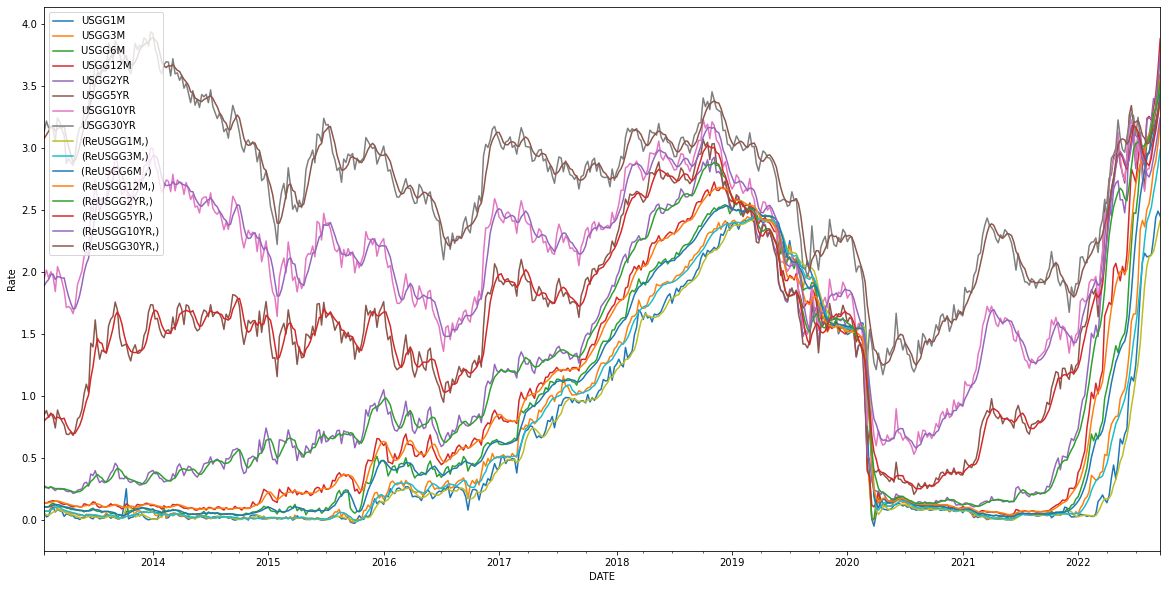

In [158]:
combo.plot(figsize=(20,10))
plt.ylabel('Rate')
plt.show()

In [161]:
combo.to_excel(excel_writer = 'us_weekly.xlsx', sheet_name = 'us_weekly')